In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df=pd.read_csv(r'C:\Users\chata\Downloads\Airbnb_Open_Data.csv',low_memory=False)

In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

**DATA CLEANING**

In [12]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

df.drop(['house_rules', 'license'], axis=1, inplace=True)
#Removing $ from price and service fee columns
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)

#Removing , from price and service fee columns
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

#Rename price and service fee columns
df.rename(columns={'price':'price_$', 'service fee': 'service_fee_$'}, inplace=True)

#Dropping Null values
df.dropna(inplace=True)

#Changing the data type 
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'],dayfirst=True)
df['Construction year']=df['Construction year'].astype(int)

In [13]:
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']="Brooklyn"


In [14]:
df=df.drop(df[df['availability 365'] > 500].index)

In [15]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

**EXPLORATORY DATA ANALYSIS**

>**Summary Statistics**

In [17]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


>__Different room types__

In [18]:
property_types= df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


>__Plotting a barchart for room type count__

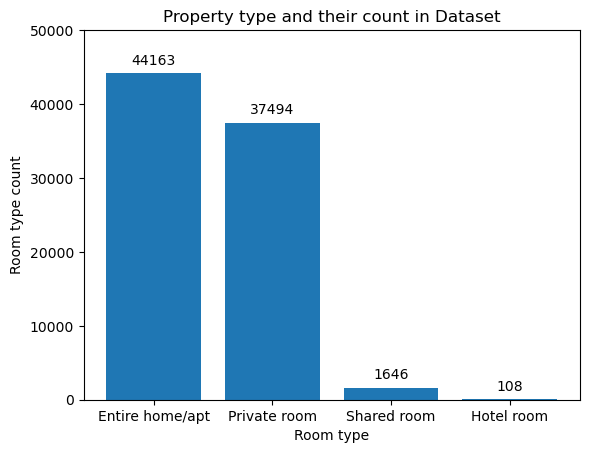

In [19]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels=property_types.loc[:,'count'],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room type');
plt.ylabel('Room type count');
plt.title('Property type and their count in Dataset');

The Airbnb dataset reveals four distinct property types.

-Entire home/apartment (44,163) is the most common property type.

-Private room (37,494) is the second most common.

-Shared rooms (1,646) and hotel rooms (108) are very rare.

Overall, the dataset is dominated by entire homes and private rooms (over 98%), showing travelers prefer privacy over shared or hotel stays.

>__Highest number of listing in Neighbourhood group__


In [20]:
neighbourhood_group=df['neighbourhood group'].value_counts().to_frame()
neighbourhood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


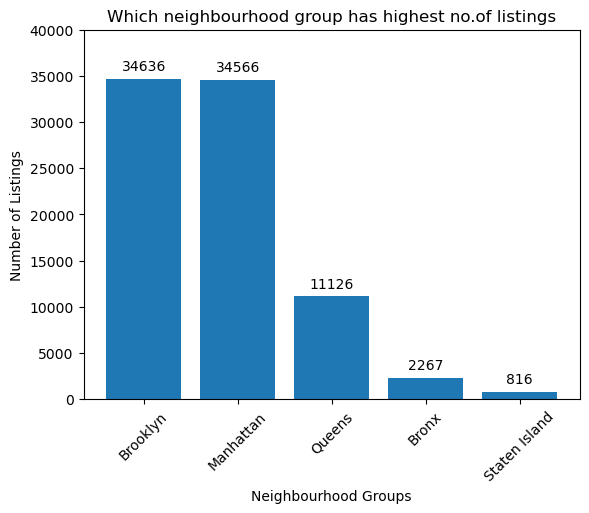

In [21]:
neighbourhood_group_bar=plt.bar(neighbourhood_group.index,neighbourhood_group.loc[:,'count']);
plt.bar_label(neighbourhood_group_bar,labels=neighbourhood_group.loc[:,'count'],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which neighbourhood group has highest no.of listings');

The dataset contains five different Neighbpourhood groups, namely Brookyln,Manhattan,Queens,Bronx,and Staten Island. According to the Barchart Brooklyn has the highest number of listings with 34636 followed by Manhattan with 34566.

>__Neighbourhood group having the highest average price for Airbnb listing__

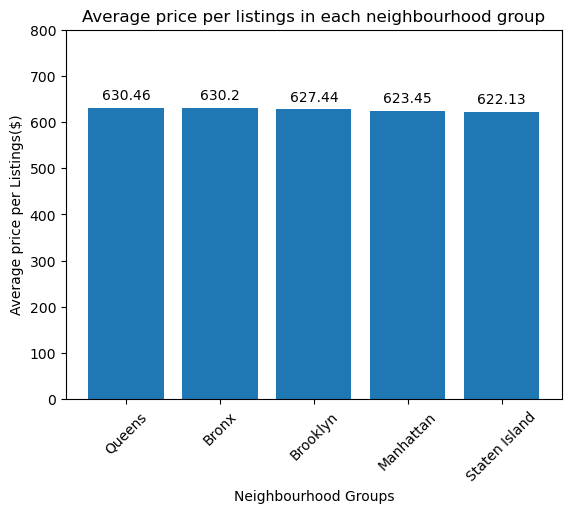

In [23]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding=4);
plt.ylim([0,800]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average price per Listings($)');
plt.xticks(rotation=45);
plt.title('Average price per listings in each neighbourhood group');

Average listing prices are almost identical.
Among all the identified neighbourhood groups, Queens has the highest average price per listings at 630.46 USD
Queens is the highest, while Staten Island is the lowest, though the gap is minimal.

Overall, there’s price consistency across boroughs, suggesting more variation may exist at the neighborhood or listing-type level.

>__Relation between Price and Construction year of property__

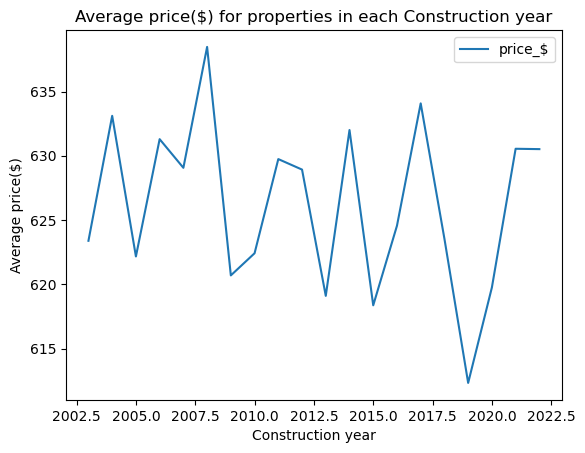

In [26]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction year');
plt.ylabel('Average price($)');
plt.title('Average price($) for properties in each Construction year');

The above chart shows the average price ($) of Airbnb properties grouped by their construction year (2002–2022).The chart highlights volatile pricing over time, with peaks before and after 2010, a sharp dip in 2020, and a recovery trend by 2022.

>__Top 10 hosts by calculated host listing count__

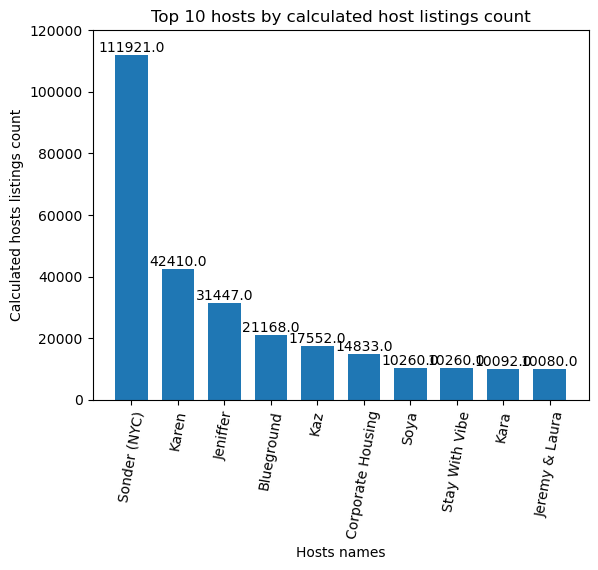

In [44]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count'],width=0.7);
plt.bar_label(hosts_bar,labels=hosts.loc[:,'calculated host listings count'],label_type='edge');
plt.ylim([0,120000]);
plt.xlabel('Hosts names');
plt.ylabel('Calculated hosts listings count');
plt.xticks(rotation=80);
plt.title('Top 10 hosts by calculated host listings count');

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder(NYC) notably leading with 111921 listings. Subsequently other hosts follow in the descending order.

Karen at second position with 42410 hosts

Jeniffer at third position with 31447 hosts

Blueground at fourth position with 21168 hosts

Kaz at fifth position with 17552 hosts

Corporate Housing at sixth position with 14833 hosts

Soya at seventh position with 10260 hosts

Stay with vibe at eight position with 10260 hosts

Kara at ninth position with 10092 hosts

and finally Jeremy and Laura at tenth position 10080 hosts


>__Are hosts with verified identities more likely to receive positive reviews?__

In [45]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


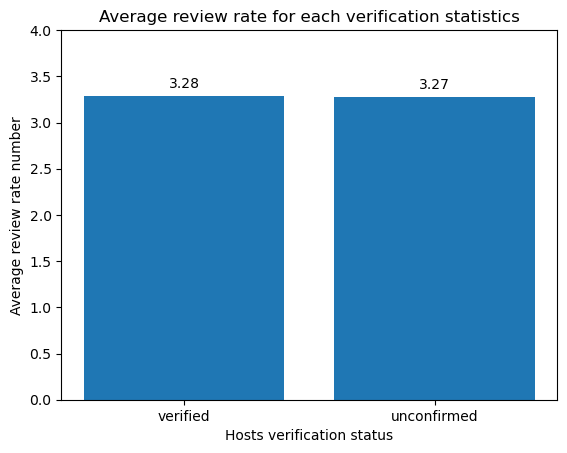

In [47]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Hosts verification status');
plt.ylabel('Average review rate number');
plt.title('Average review rate for each verification statistics');

The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

>__Correlation between the price of a listing and its service fee__

In [49]:
df['price_$'].corr(df['service_fee_$'])

0.9999909074778258

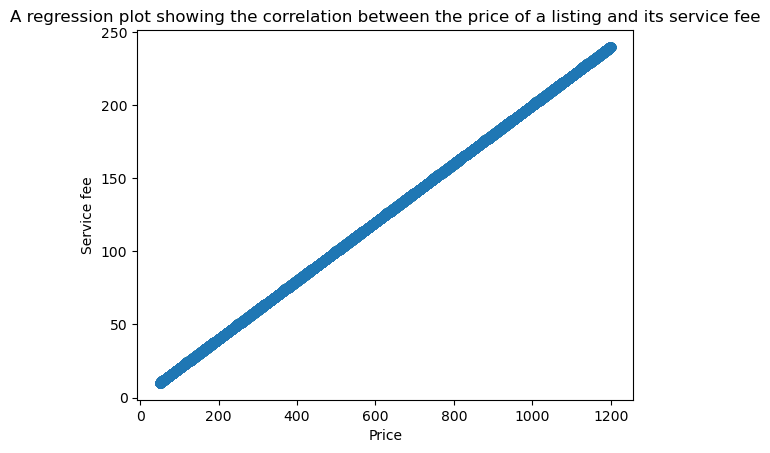

In [53]:
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel('Price');
plt.ylabel('Service fee');
plt.title('A regression plot showing the correlation between the price of a listing and its service fee');

The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

>__What is the average review rate number(stars) for listings , and does it vary based on the neighbourhood group and room types?__

In [54]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

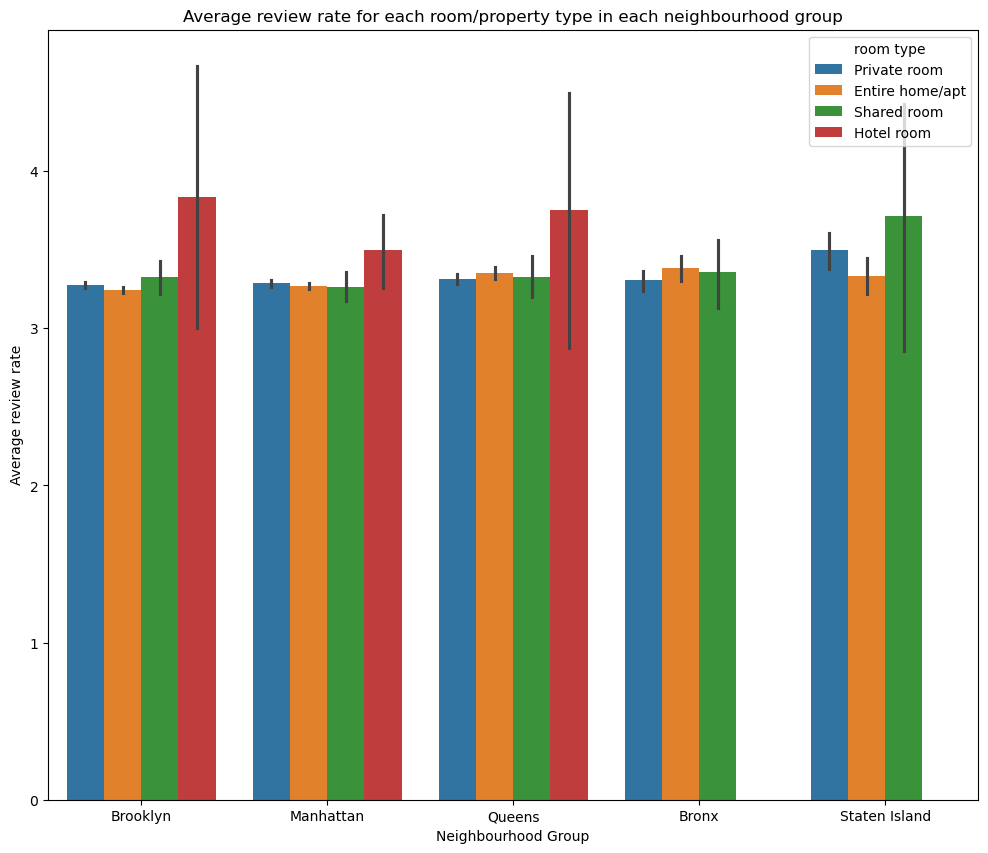

In [58]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x='neighbourhood group', y='review rate number', hue= 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average review rate');
plt.title('Average review rate for each room/property type in each neighbourhood group');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens.

>__Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?__

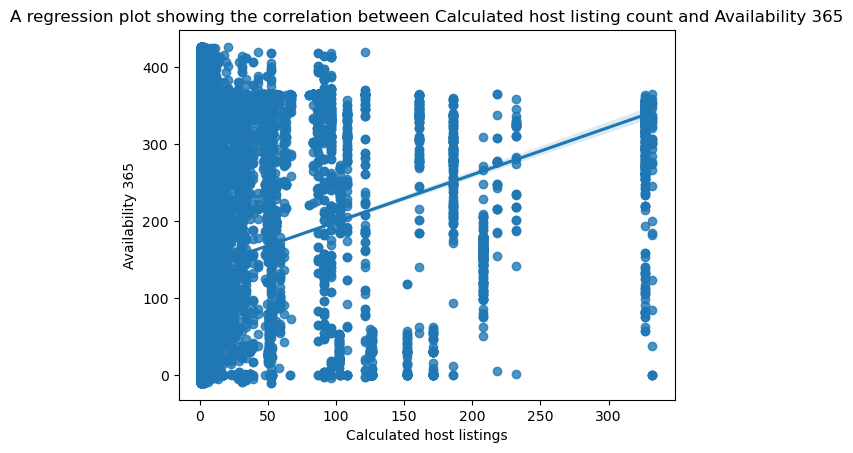

In [55]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated host listings');
plt.ylabel('Availability 365');
plt.title('A regression plot showing the correlation between Calculated host listing count and Availability 365');

In [56]:
df['calculated host listings count'].corr(df['availability 365'])

0.13598552736758698

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

__Conclusion__

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry